# Archivo business

# Se importan librerías

In [ ]:
import pickle
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

Se comienza importando el archivo "business" de la base de datos de yelp

In [ ]:
# Ruta al archivo PKL que quieres leer
archivo_pkl = 'business.pkl'

# Abrir y cargar el archivo PKL
with open(archivo_pkl, 'rb') as file:
    business = pickle.load(file)


In [ ]:
business.head(2)

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,...,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ","1616 Chapala St, Ste 2",Santa Barbara,NaN,93101,34.426679,-119.711197,5.0,7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,mpf3x-BjTdTEA3yCZrAYPw,The UPS Store,87 Grasso Plaza Shopping Center,Affton,NaN,63123,38.551126,-90.335695,3.0,15,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


se corrobora las dimensiones del dataset

In [ ]:
business.shape

(150346, 28)

Se corrobora cantidad de vlaores nulos por columna, y nombres de columnas

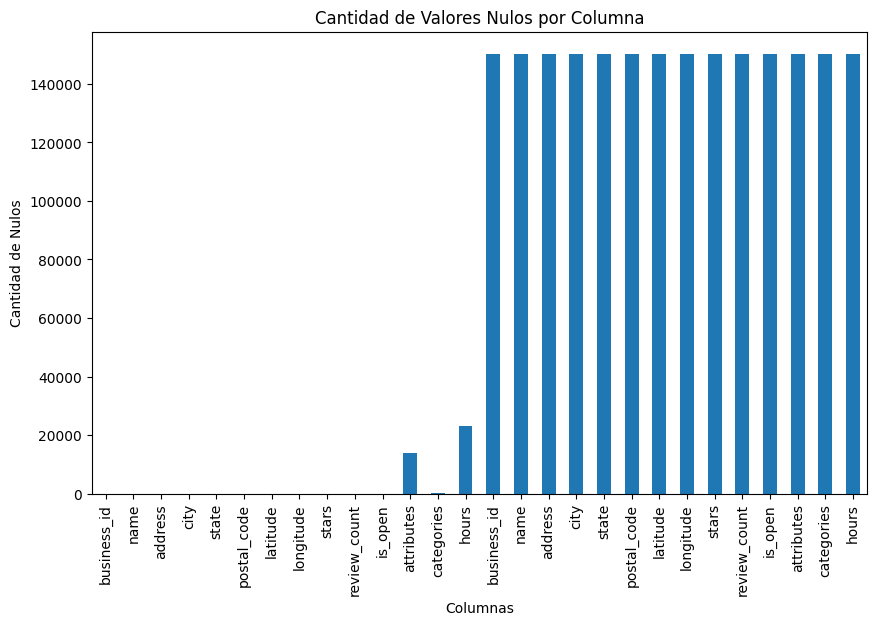

In [ ]:
# Se cuentan los valores nulos por columna
null_counts = business.isnull().sum()

# Se crea el gráfico
plt.figure(figsize=(10, 6))
null_counts.plot(kind='bar')
plt.title('Cantidad de Valores Nulos por Columna')
plt.xlabel('Columnas')
plt.ylabel('Cantidad de Nulos')
plt.show()



Se observa que existen columnas duplicadas

# Se eliminan columnas duplicadas

In [ ]:
business = business.loc[:, ~business.columns.duplicated()]


visualizamos con esta reducción de datos una vez más los nulos

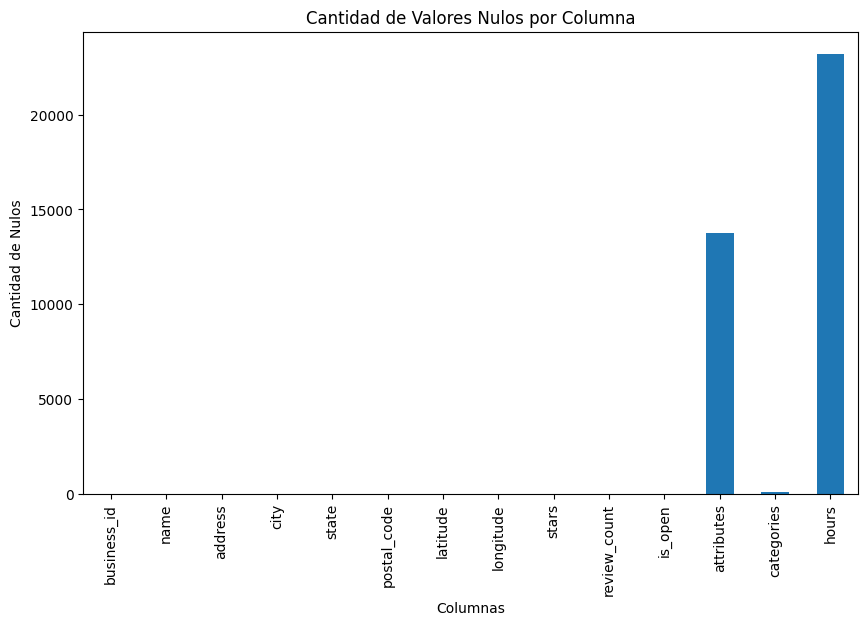

In [ ]:
# Se cuentan los valores nulos por columna
null_counts = business.isnull().sum()

# Se crea el gráfico
plt.figure(figsize=(10, 6))
null_counts.plot(kind='bar')
plt.title('Cantidad de Valores Nulos por Columna')
plt.xlabel('Columnas')
plt.ylabel('Cantidad de Nulos')
plt.show()

se observa que las columnas "attributes" y "hours" presentan una cantidad significativa de nulos, para ahondar un poco más esta cuestión se corrobora esta información en términos de porcentajes

# Porcentajes de nulos para las columnas "attributes" y "hours"

In [ ]:
# Se calcula el porcentaje de nulos en las columnas 'attributes' y 'hours'
attributes_null_percentage = (business["attributes"].isnull().sum() / len(business)) * 100
hours_null_percentage = (business["hours"].isnull().sum() / len(business)) * 100

# Se imprime los porcentajes de nulos con formato
print("Porcentaje de nulos en la columna 'attributes': {:.2f}%".format(attributes_null_percentage))
print("Porcentaje de nulos en la columna 'hours': {:.2f}%".format(hours_null_percentage))


Porcentaje de nulos en la columna 'attributes': 9.14%
Porcentaje de nulos en la columna 'hours': 15.45%


In [ ]:
business.dtypes

business_id     object
name            object
address         object
city            object
state           object
postal_code     object
latitude        object
longitude       object
stars           object
review_count    object
is_open         object
attributes      object
categories      object
hours           object
dtype: object

# Columnas hours contiene datos anidados

In [ ]:
business["hours"].head(10)

0                                                 None
1    {'Monday': '0:0-0:0', 'Tuesday': '8:0-18:30', ...
2    {'Monday': '8:0-22:0', 'Tuesday': '8:0-22:0', ...
3    {'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ...
4    {'Wednesday': '14:0-22:0', 'Thursday': '16:0-2...
5    {'Monday': '0:0-0:0', 'Tuesday': '6:0-22:0', '...
6    {'Monday': '0:0-0:0', 'Tuesday': '10:0-18:0', ...
7    {'Monday': '9:0-17:0', 'Tuesday': '9:0-17:0', ...
8                                                 None
9    {'Monday': '0:0-0:0', 'Tuesday': '6:0-21:0', '...
Name: hours, dtype: object

Se observa que una vez desanidada la columna "hours" aparecen nuevas columnas con gran cantidad de valores nan

# Se elimina la columna hours

In [ ]:
# Eliminar la columna 'hours' original
business.drop(columns=['hours'], inplace=True)

# Columna Atributes

por lo anterior, si se elimina Atributes se está sacano el 9% de los datos aprox

In [ ]:
business.drop(columns=['attributes'], inplace=True)

se corrobora cuántos nulos quedan

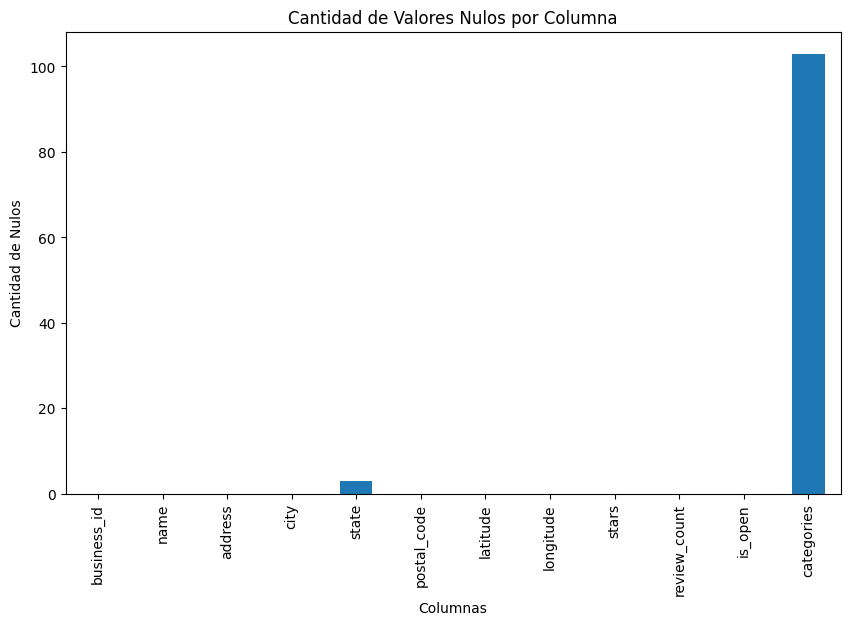

In [ ]:
# Contar los valores nulos por columna
null_counts = business.isnull().sum()

# Crear el gráfico
plt.figure(figsize=(10, 6))
null_counts.plot(kind='bar')
plt.title('Cantidad de Valores Nulos por Columna')
plt.xlabel('Columnas')
plt.ylabel('Cantidad de Nulos')
plt.show()

quitar estos valores faltantes no cambia significativamente la estructura del dataset

In [ ]:
business.dropna(inplace=True)

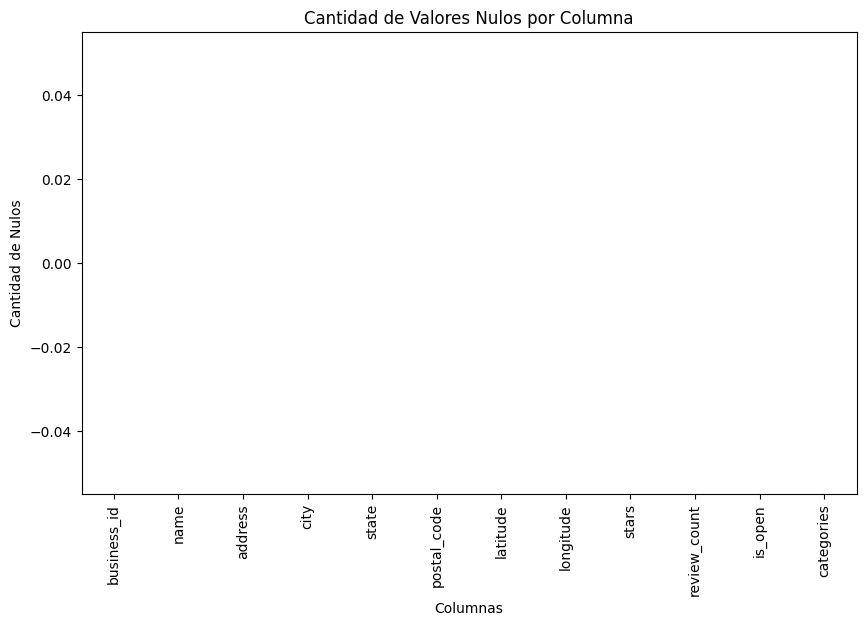

In [ ]:
# Contar los valores nulos por columna
null_counts = business.isnull().sum()

# Crear el gráfico
plt.figure(figsize=(10, 6))
null_counts.plot(kind='bar')
plt.title('Cantidad de Valores Nulos por Columna')
plt.xlabel('Columnas')
plt.ylabel('Cantidad de Nulos')
plt.show()

# Se desanida y visualiza la columna "categories"

In [ ]:
# Dividir la cadena por comas y utilizar la función explode para desanidar
business['categories'] = business['categories'].str.split(', ')
business = business.explode('categories')

In [ ]:
business.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories
0,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ","1616 Chapala St, Ste 2",Santa Barbara,NaN,93101,34.426679,-119.711197,5.0,7,0,{'ByAppointmentOnly': 'True'},Doctors
0,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ","1616 Chapala St, Ste 2",Santa Barbara,NaN,93101,34.426679,-119.711197,5.0,7,0,{'ByAppointmentOnly': 'True'},Traditional Chinese Medicine
0,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ","1616 Chapala St, Ste 2",Santa Barbara,NaN,93101,34.426679,-119.711197,5.0,7,0,{'ByAppointmentOnly': 'True'},Naturopathic/Holistic
0,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ","1616 Chapala St, Ste 2",Santa Barbara,NaN,93101,34.426679,-119.711197,5.0,7,0,{'ByAppointmentOnly': 'True'},Acupuncture
0,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ","1616 Chapala St, Ste 2",Santa Barbara,NaN,93101,34.426679,-119.711197,5.0,7,0,{'ByAppointmentOnly': 'True'},Health & Medical


Hay que tener presenta que ahora existen varios registros que poseen distintas categorías, correspondiendo cada una al mismo negocio

# Top 10 categorías

Se visualizan las categorías más concurridas de los negocios de Florida

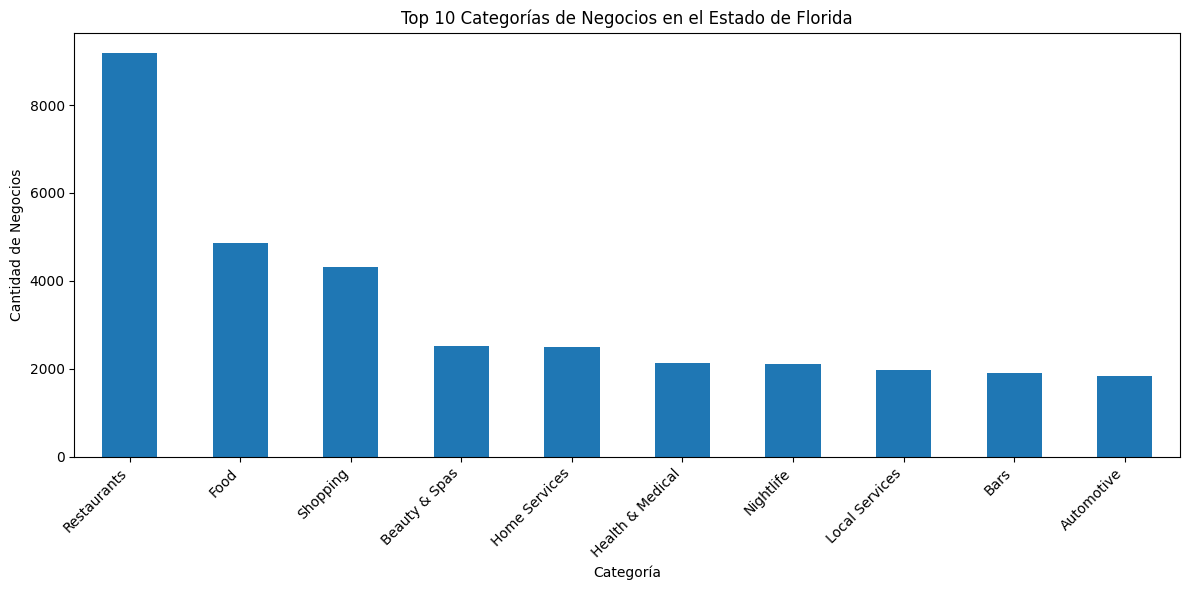

In [ ]:
# Filtra el DataFrame para obtener solo negocios en el estado de Florida
df_florida = business[business['state'] == 'FL']

# Calcula la cantidad de negocios por cada categoría
categorias_count = df_florida['categories'].str.split(', ', expand=True).stack().value_counts()

# Filtra las categorías con más de 10 negocios para una visualización más clara
categorias_count = categorias_count[categorias_count > 10]

# Crea el gráfico de barras
plt.figure(figsize=(12, 6))
categorias_count.head(10).plot(kind='bar')
plt.xlabel('Categoría')
plt.ylabel('Cantidad de Negocios')
plt.title('Top 10 Categorías de Negocios en el Estado de Florida')
plt.xticks(rotation=45, ha="right")

# Muestra el gráfico
plt.tight_layout()
plt.show()


Se puede observar que la mayoría de los negocios poseen la categoría "Restaurants", aunque es cierto que también muchos de ellos poseen también otras categorías más

# Restaurantes con más reviews en Florida

Dado que estamos interesados en enfocar nuestro trabajo en el estado de Florida, se explora un poco los restaurantes con más reviews, dado que uno de nuestros KPIs utilizará parte de estos datos

se convierten las columnas "stars" y "review_count" a formato numérico

In [ ]:
# Convierte las columnas 'stars' y 'review_count' a formato numérico
business['stars'] = pd.to_numeric(business['stars'], errors='coerce')
business['review_count'] = pd.to_numeric(business['review_count'], errors='coerce')

se realiza el filtro para luego visualizar el gráfico

Top 10 Restaurantes con Más Reseñas en Florida:
['Oceana Grill', 'Ruby Slipper - New Orleans', 'The Pharmacy', 'Café Amelie', "Jim's South St", 'The Eagle', 'Bourbon House', 'Sampan', 'Palace Café', 'Salt + Smoke']


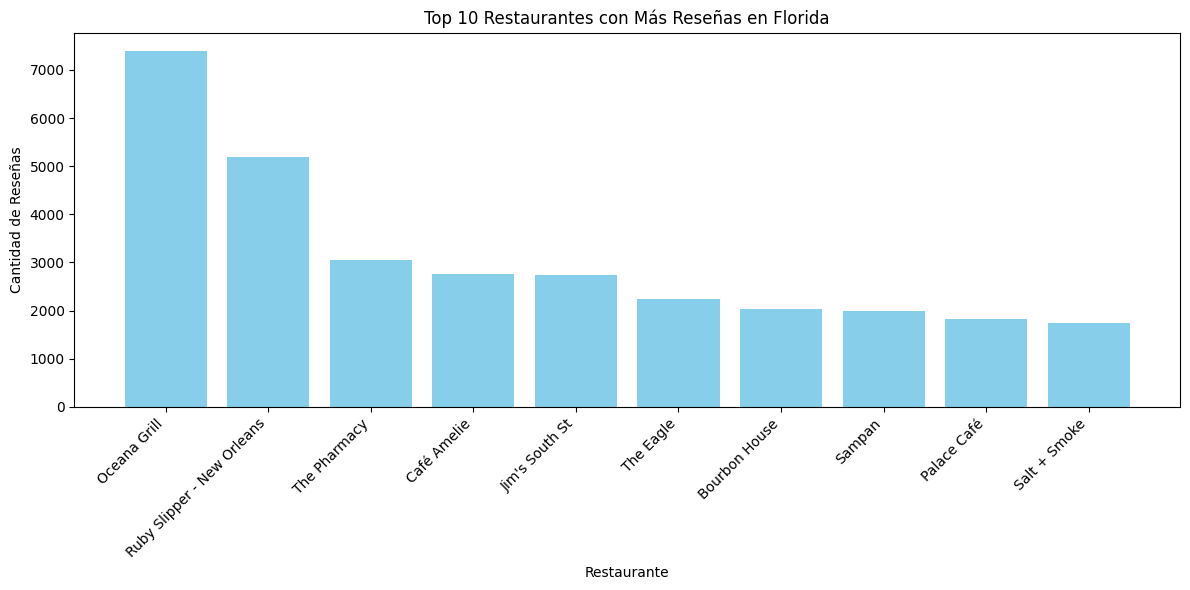

In [ ]:
# Filtra el DataFrame para obtener solo negocios en la categoría de "Restaurants" en el estado de Florida
df_florida_restaurants = business[(business['state'] == 'FL') & (business['categories'].str.contains('Restaurants', case=False, na=False))]

# Ordena de mayor a menor por la cantidad de reseñas y toma el top 10
top_10_restaurants = df_florida_restaurants.sort_values(by='review_count', ascending=False).head(10)

if not top_10_restaurants.empty:
    # Imprime los nombres de los restaurantes
    print("Top 10 Restaurantes con Más Reseñas en Florida:")
    print(top_10_restaurants['name'].tolist())

    # Crea el gráfico de barras
    plt.figure(figsize=(12, 6))
    plt.bar(top_10_restaurants['name'], top_10_restaurants['review_count'], color='skyblue')
    plt.xlabel('Restaurante')
    plt.ylabel('Cantidad de Reseñas')
    plt.title('Top 10 Restaurantes con Más Reseñas en Florida')
    plt.xticks(rotation=45, ha="right")

    # Muestra el gráfico
    plt.tight_layout()
    plt.show()
else:
    print("No hay datos suficientes para graficar.")


# Top 10 comercios de comida rápida

Filtramos las etiquetas "Food" que figura segundo en el ranking

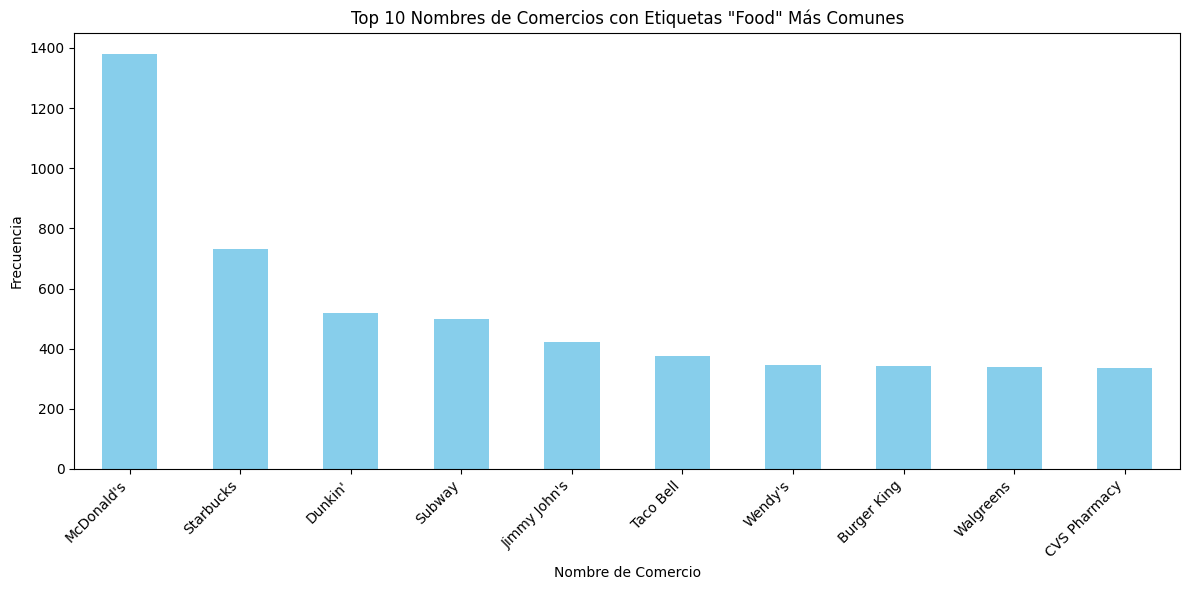

In [ ]:
# Filtra el DataFrame para obtener solo los negocios con etiquetas de "Food"
food_businesses = business[business['categories'].str.contains('Food', case=False, na=False)]

# Cuenta la frecuencia de cada nombre de comercio
names_count = food_businesses['name'].value_counts()

# Toma el top 10 de nombres de comercios más comunes
top_10_names = names_count.head(10)

# Crea el gráfico de barras
plt.figure(figsize=(12, 6))
top_10_names.plot(kind='bar', color='skyblue')
plt.xlabel('Nombre de Comercio')
plt.ylabel('Frecuencia')
plt.title('Top 10 Nombres de Comercios con Etiquetas "Food" Más Comunes')
plt.xticks(rotation=45, ha="right")

# Muestra el gráfico
plt.tight_layout()
plt.show()


# Top 10 comercios del tipo "Bars"

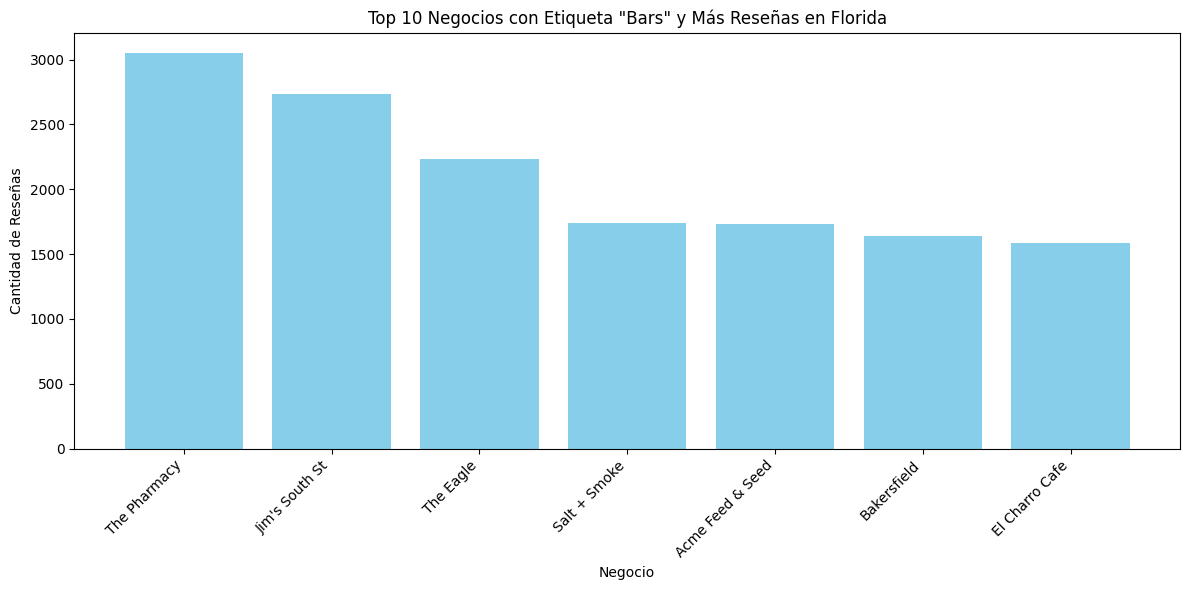

In [ ]:
# Filtra el DataFrame para obtener solo negocios con la etiqueta "Bars" en la columna de categorías en el estado de Florida
df_florida_bars = business[(business['state'] == 'FL') & (business['categories'].str.contains('Bars', case=False, na=False))]

# Ordena de mayor a menor por la cantidad de reseñas y toma el top 10
top_10_bars = df_florida_bars.sort_values(by='review_count', ascending=False).head(10)

# Crea el gráfico de barras con la cantidad de reseñas
plt.figure(figsize=(12, 6))
plt.bar(top_10_bars['name'], top_10_bars['review_count'], color='skyblue')
plt.xlabel('Negocio')
plt.ylabel('Cantidad de Reseñas')
plt.title('Top 10 Negocios con Etiqueta "Bars" y Más Reseñas en Florida')
plt.xticks(rotation=45, ha="right")

# Muestra el gráfico
plt.tight_layout()
plt.show()


In [ ]:
# Guardar en formato Parquet
business.to_parquet('business_yelp.parquet', index=False)

# Archivo checkin.json

In [ ]:
import json

# Inicializar una lista para almacenar los objetos JSON
data_list = []

# Abrir el archivo JSON y cargar su contenido línea por línea
with open('checkin.json', 'r') as file:
    for line in file:
        try:
            item = json.loads(line)
            data_list.append(item)
        except json.JSONDecodeError:
            pass  # Ignorar líneas inválidas



In [ ]:
checkin = pd.DataFrame(data_list)

In [ ]:
checkin.head()

,business_id,date
0,---kPU91CF4Lq2-WlRu9Lw,"2020-03-13 21:10:56, 2020-06-02 22:18:06, 2020..."
1,--0iUa4sNDFiZFrAdIWhZQ,"2010-09-13 21:43:09, 2011-05-04 23:08:15, 2011..."
2,--30_8IhuyMHbSOcNWd6DQ,"2013-06-14 23:29:17, 2014-08-13 23:20:22"
3,--7PUidqRWpRSpXebiyxTg,"2011-02-15 17:12:00, 2011-07-28 02:46:10, 2012..."
4,--7jw19RH9JKXgFohspgQw,"2014-04-21 20:42:11, 2014-04-28 21:04:46, 2014..."


La columna "date" contiene datos separados por coma. Se separará el dataset de acuerdo a las fechas por coma

In [ ]:
# Crear una lista para almacenar las fechas separadas
separated_dates = []

# Iterar sobre las filas y separar las fechas
for index, row in checkin.iterrows():
    dates = row['date'].split(', ')
    for date in dates:
        separated_dates.append([row['business_id'], date])

# Crear un nuevo DataFrame con las fechas separadas
new_columns = ['business_id', 'date']
checkin = pd.DataFrame(separated_dates, columns=new_columns)

Se cambia el formato de la columna "date" a formato datetime

In [ ]:
# CSe convierte la columna 'date' a formato datetime
checkin['date'] = pd.to_datetime(checkin['date'])

# Valores nulos

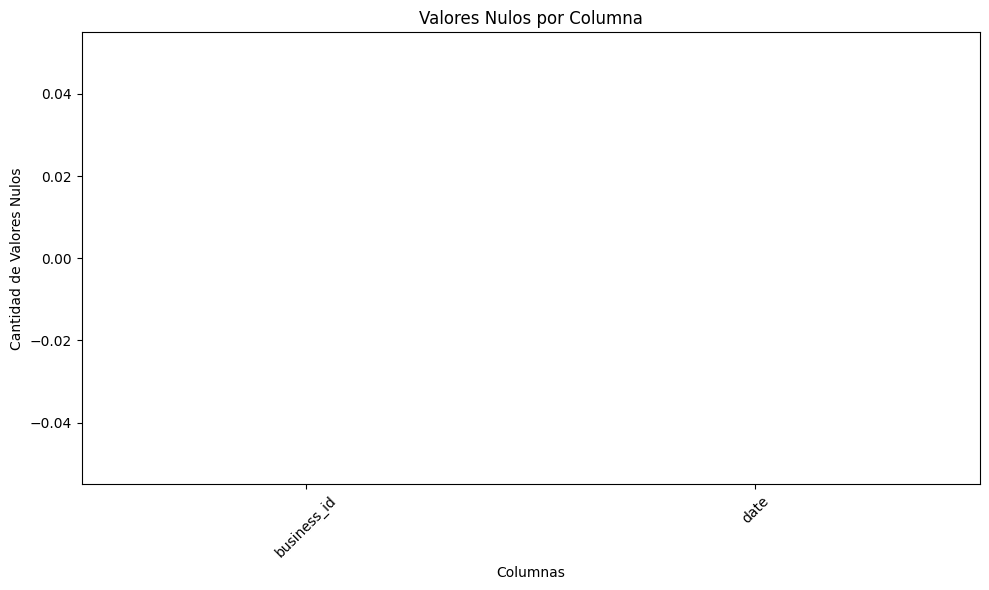

In [ ]:
# Calcular la cantidad de valores nulos por columna
null_counts = checkin.isnull().sum()

# Crear un gráfico de barras
plt.figure(figsize=(10, 6))
null_counts.plot(kind='bar', color='blue')
plt.xlabel('Columnas')
plt.ylabel('Cantidad de Valores Nulos')
plt.title('Valores Nulos por Columna')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Sin nulos

In [ ]:
checkin.to_parquet('checkin_yelp.parquet', index=False)


# Visualización de los datos

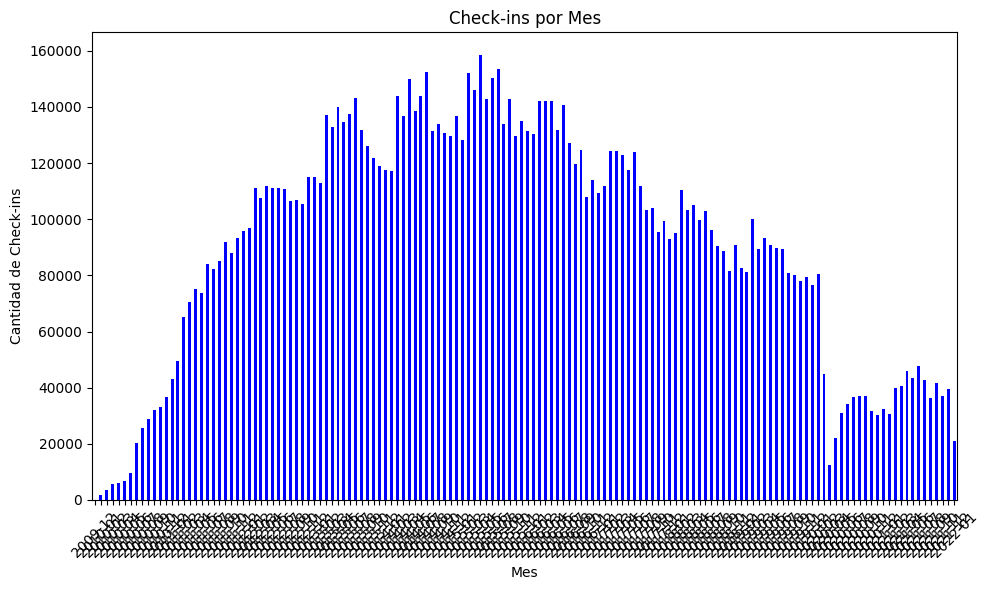

In [ ]:

import matplotlib.pyplot as plt


# Agrupa los datos por mes y cuenta la cantidad de eventos de check-in en cada mes
checkin_grouped = checkin.groupby(checkin['date'].dt.to_period('M')).size()

# Crea un gráfico de barras
plt.figure(figsize=(10, 6))
checkin_grouped.plot(kind='bar', color='blue')
plt.xlabel('Mes')
plt.ylabel('Cantidad de Check-ins')
plt.title('Check-ins por Mes')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



Dado que esta forma de ver los datos no es conveniente se visualizará de acuerdo a los datos de los últimos años

# Escala : En el siguiente gráfico 1e6 significa por ejemplo 1,000,000

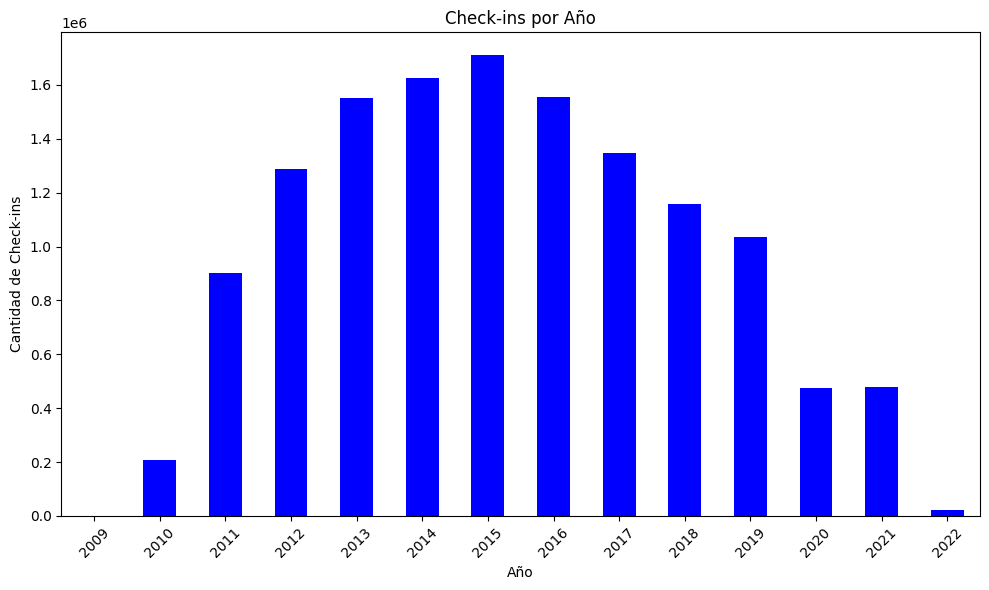

In [ ]:
# Agrupa los datos por año y cuenta la cantidad de eventos de check-in en cada año
checkin_grouped = checkin.groupby(checkin['date'].dt.year).size()

# Crear un gráfico de barras para la cantidad de check-ins por año
plt.figure(figsize=(10, 6))
checkin_grouped.plot(kind='bar', color='blue')
plt.xlabel('Año')
plt.ylabel('Cantidad de Check-ins')
plt.title('Check-ins por Año')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# Años 2020 - 2021 y 2022

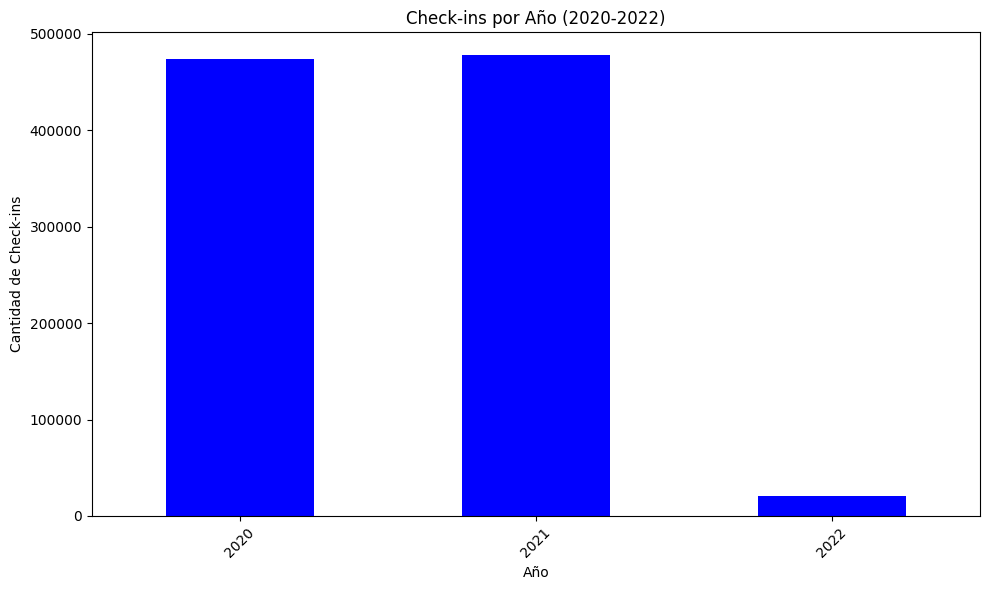

In [ ]:
# Filtrar los datos para incluir solo los años 2020, 2021 y 2022
checkin_filtered = checkin[checkin['date'].dt.year.isin([2020, 2021, 2022])]

# Agrupa los datos por año y cuenta la cantidad de eventos de check-in en cada año
checkin_grouped = checkin_filtered.groupby(checkin_filtered['date'].dt.year).size()

# Crear un gráfico de barras para la cantidad de check-ins por año
plt.figure(figsize=(10, 6))
checkin_grouped.plot(kind='bar', color='blue')
plt.xlabel('Año')
plt.ylabel('Cantidad de Check-ins')
plt.title('Check-ins por Año (2020-2022)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



# Año 2020

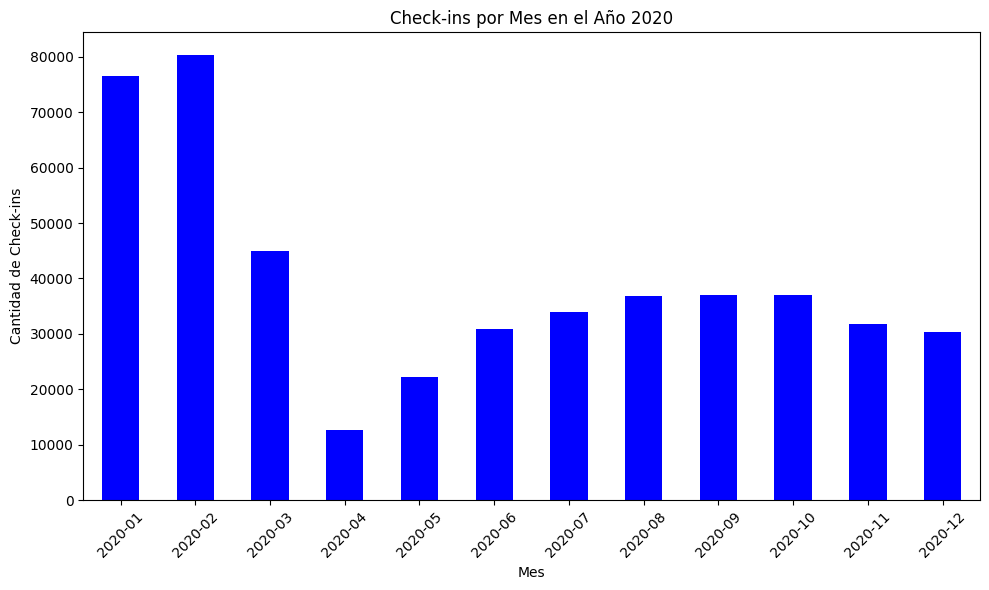

In [ ]:
# Filtrar los datos para incluir solo el año 2020
checkin_2020 = checkin[checkin['date'].dt.year == 2020]

# Crear un índice con todos los meses del año 2020
months_index = pd.period_range(start='2020-01', end='2020-12', freq='M')

# Agrupa los datos por mes y cuenta la cantidad de eventos de check-in en cada mes
checkin_grouped = checkin_2020.groupby(checkin_2020['date'].dt.to_period('M')).size()

# Reindexar para incluir todos los meses y llenar valores faltantes con ceros
checkin_grouped = checkin_grouped.reindex(months_index, fill_value=0)

# Crear un gráfico de barras para la cantidad de check-ins por mes en el año 2022
plt.figure(figsize=(10, 6))
checkin_grouped.plot(kind='bar', color='blue')
plt.xlabel('Mes')
plt.ylabel('Cantidad de Check-ins')
plt.title('Check-ins por Mes en el Año 2020')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# Año 2021

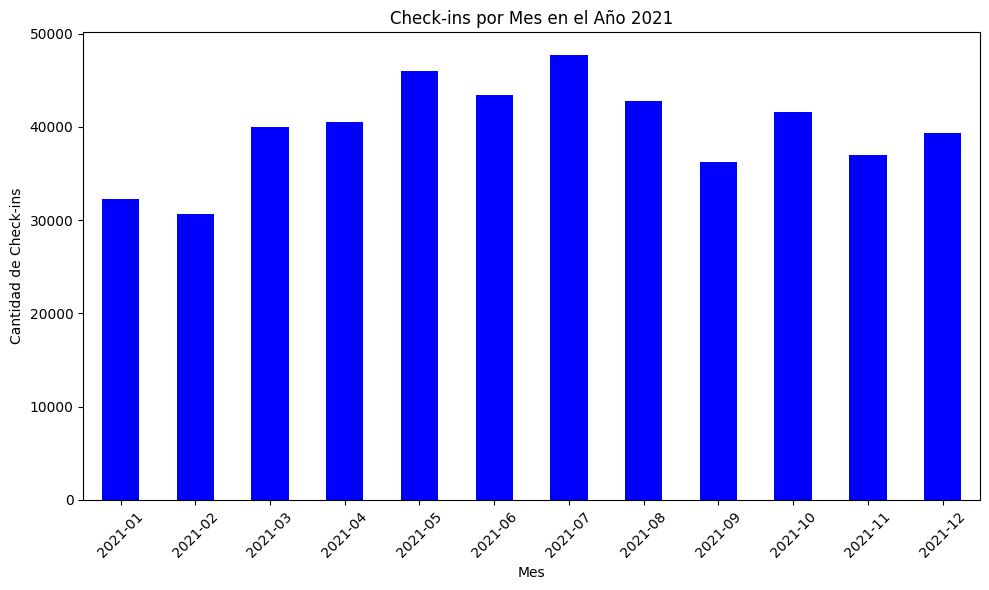

In [ ]:
# Filtrar los datos para incluir solo el año 2021
checkin_2021 = checkin[checkin['date'].dt.year == 2021]

# Crear un índice con todos los meses del año 2021
months_index = pd.period_range(start='2021-01', end='2021-12', freq='M')

# Agrupa los datos por mes y cuenta la cantidad de eventos de check-in en cada mes
checkin_grouped = checkin_2021.groupby(checkin_2021['date'].dt.to_period('M')).size()

# Reindexar para incluir todos los meses y llenar valores faltantes con ceros
checkin_grouped = checkin_grouped.reindex(months_index, fill_value=0)

# Crear un gráfico de barras para la cantidad de check-ins por mes en el año 2021
plt.figure(figsize=(10, 6))
checkin_grouped.plot(kind='bar', color='blue')
plt.xlabel('Mes')
plt.ylabel('Cantidad de Check-ins')
plt.title('Check-ins por Mes en el Año 2021')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



# Año 2022

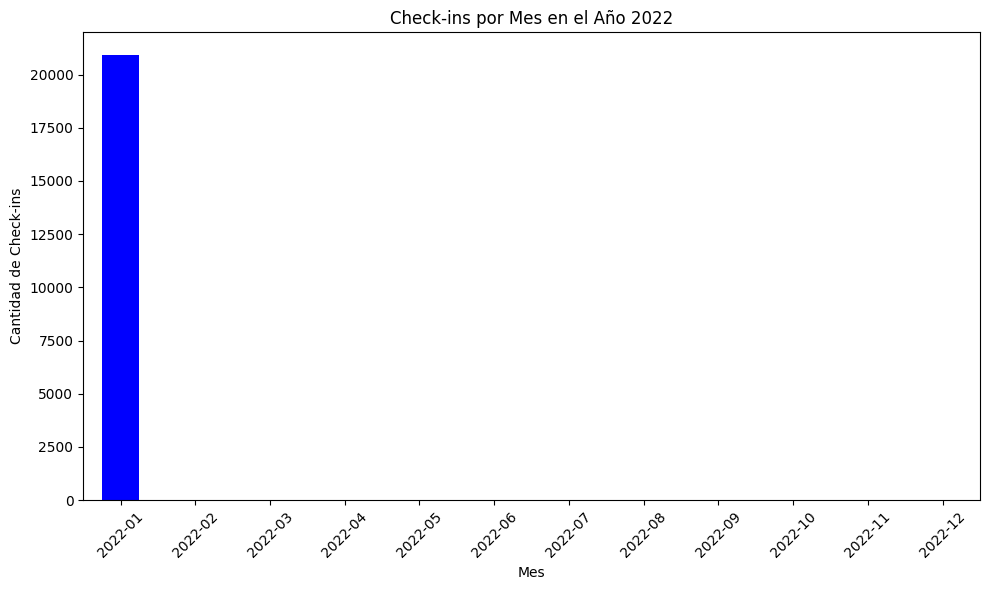

In [ ]:
# Filtrar los datos para incluir solo el año 2022
checkin_2022 = checkin[checkin['date'].dt.year == 2022]

# Crear un índice con todos los meses del año 2022
months_index = pd.period_range(start='2022-01', end='2022-12', freq='M')

# Agrupa los datos por mes y cuenta la cantidad de eventos de check-in en cada mes
checkin_grouped = checkin_2022.groupby(checkin_2022['date'].dt.to_period('M')).size()

# Reindexar para incluir todos los meses y llenar valores faltantes con ceros
checkin_grouped = checkin_grouped.reindex(months_index, fill_value=0)

# Crear un gráfico de barras para la cantidad de check-ins por mes en el año 2021
plt.figure(figsize=(10, 6))
checkin_grouped.plot(kind='bar', color='blue')
plt.xlabel('Mes')
plt.ylabel('Cantidad de Check-ins')
plt.title('Check-ins por Mes en el Año 2022')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



los datos que proveen este dataset llegan hasta enero del año 2022

# Archivo tips

In [ ]:
import json

# Inicializar una lista para almacenar los objetos JSON
data_list = []

# Abrir el archivo JSON y cargar su contenido línea por línea
with open('tips.json', 'r') as file:
    for line in file:
        try:
            item = json.loads(line)
            data_list.append(item)
        except json.JSONDecodeError:
            pass  # Ignorar líneas inválidas


In [ ]:
tips = pd.DataFrame(data_list)

In [ ]:
tips.head()

,user_id,business_id,text,date,compliment_count
0,AGNUgVwnZUey3gcPCJ76iw,3uLgwr0qeCNMjKenHJwPGQ,Avengers time with the ladies.,2012-05-18 02:17:21,0
1,NBN4MgHP9D3cw--SnauTkA,QoezRbYQncpRqyrLH6Iqjg,They have lots of good deserts and tasty cuban...,2013-02-05 18:35:10,0
2,-copOvldyKh1qr-vzkDEvw,MYoRNLb5chwjQe3c_k37Gg,It's open even when you think it isn't,2013-08-18 00:56:08,0
3,FjMQVZjSqY8syIO-53KFKw,hV-bABTK-glh5wj31ps_Jw,Very decent fried chicken,2017-06-27 23:05:38,0
4,ld0AperBXk1h6UbqmM80zw,_uN0OudeJ3Zl_tf6nxg5ww,Appetizers.. platter special for lunch,2012-10-06 19:43:09,0


In [ ]:
tips.dtypes

user_id             object
business_id         object
text                object
date                object
compliment_count     int64
dtype: object

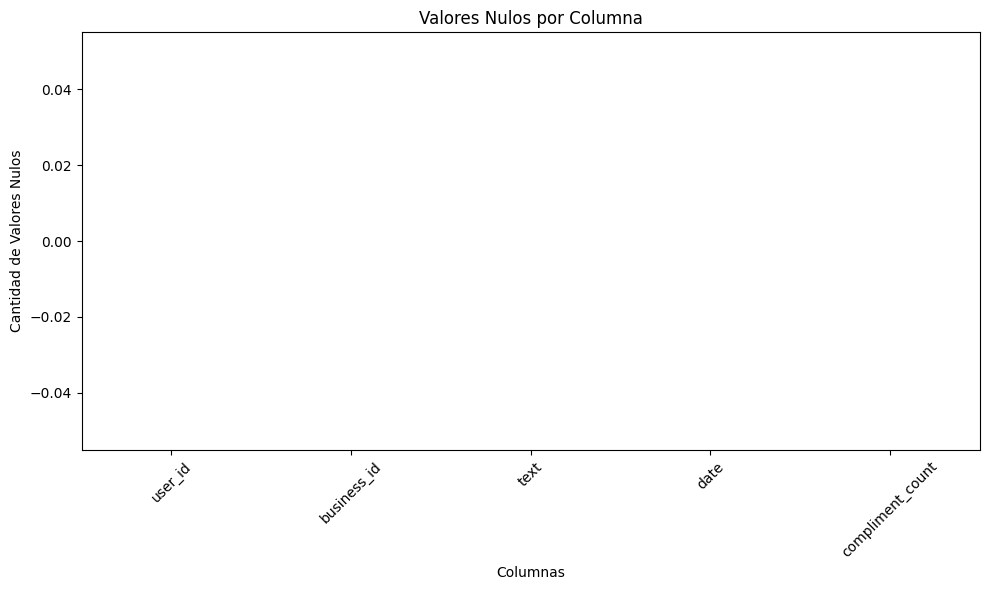

In [ ]:
# Calcular la cantidad de valores nulos por columna
null_counts = tips.isnull().sum()

# Crear un gráfico de barras para los valores nulos
plt.figure(figsize=(10, 6))
null_counts.plot(kind='bar', color='red')
plt.xlabel('Columnas')
plt.ylabel('Cantidad de Valores Nulos')
plt.title('Valores Nulos por Columna')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

sin nulos

In [ ]:
tips.to_parquet('tips.parquet', index=False)

# Dimensiones de los 3 dataframes

In [ ]:
tips.shape

(908915, 5)

In [ ]:
checkin.shape

(13356875, 2)

In [ ]:
business.shape

(668575, 12)